# Text Corpora, Lexical Resources, Preprocessing

---
1. Data Retrieval <br> (1) Web </br> (2) PDF <br> (3) Word File </br> (4) NLTK Built-in Corpora (Brown, Treebank)

2. Lexical Resources <br> (1) WordNet Structure (Synsets, Relations) </br> (2) Regular Expressions <br> (3) Word Normalization </br> (4) OOV (Out-of-Vocabulary)

## 1. Data Retrieval

In this practice, we learn how to retrieve text data from various sources. We will work with web pages, PDF documents, Word files, and built-in corpora in NLTK.


In [2]:
# Install Required Libraries
!pip install wikipedia-api PyPDF2 python-docx

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 21.4 MB/s eta 0:00:00
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=215919ff1570f225318a39a25e3f035570f5627070e9bb87422663303e0be8cf
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


### Retrieving Data from the Web - Wikipedia

Use the `wikipedia` library to fetch the content of a specific Wikipedia page.

In [3]:
import wikipediaapi

# Set up Wikipedia API (language: English, User-Agent setting)
wiki_wiki = wikipediaapi.Wikipedia('MyProjectName (merlin@example.com)', 'en')

page_title = 'Natural language processing'
page_py = wiki_wiki.page(page_title)

if page_py.exists():
    print(f"Found the page '{page_title}'.")
    wiki_text = page_py.text
    print(wiki_text[:500]) # Print only part of the content
else:
    print(f"Could not find the page '{page_title}'.")

Found the page 'Natural language processing'.
Natural language processing (NLP) is the processing of natural language information by a computer. The study of NLP, a subfield of computer science, is generally associated with artificial intelligence. NLP is related to information retrieval, knowledge representation, computational linguistics, and more broadly with linguistics.
Major processing tasks in an NLP system include: speech recognition, text classification, natural language understanding, and natural language generation.

History
Natu


### (2) Extracting Text from a PDF File

Use the `PyPDF2` library to extract text from a local PDF file.

**※ Preparation for Practice:** Before running this code, make sure you have a PDF file named `paper.pdf` in the same directory as your notebook file.

In [5]:
import PyPDF2
import os

pdf_filename = 'paper.pdf'
pdf_text = ""

# Check if the user has prepared the sample PDF
if not os.path.exists(pdf_filename):
    print(f"The file '{pdf_filename}' does not exist. Please prepare a PDF file for the practice.")
else:
    try:
        # Open the file in read-binary mode
        with open(pdf_filename, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            for page in pdf_reader.pages:
                pdf_text += page.extract_text()
        print(f"Successfully read the file '{pdf_filename}'!")
        print(pdf_text[:1000])
    except Exception as e:
        print(f"An error occurred while reading the PDF file: {e}")

Successfully read the file 'paper.pdf'!
Attention Is All You Need
Ashish Vaswani
Google Brain
avaswani@google.comNoam Shazeer
Google Brain
noam@google.comNiki Parmar
Google Research
nikip@google.comJakob Uszkoreit
Google Research
usz@google.com
Llion Jones
Google Research
llion@google.comAidan N. Gomezy
University of Toronto
aidan@cs.toronto.eduŁukasz Kaiser
Google Brain
lukaszkaiser@google.com
Illia Polosukhinz
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring signiﬁcan

### (3) Extracting Text from a Word File

Use the `python-docx` library to extract text from a `.docx` file.

**※ Preparation for Practice:** Please prepare a Word file named `word.docx` in the same directory as your notebook file before running this code.

In [7]:
import docx

word_filename = 'word.docx'
word_text = ""

if not os.path.exists(word_filename):
    print(f"The file '{word_filename}' does not exist. Please prepare a Word file for the practice.")
else:
    try:
        doc = docx.Document(word_filename)
        for para in doc.paragraphs:
            word_text += para.text + '\n'
        print(f"Successfully read the file '{word_filename}'!")
        print(word_text[:500])
    except Exception as e:
        print(f"An error occurred while reading the Word file: {e}")

Successfully read the file 'word.docx'!
Abstract
This document is a supplement to the general guidelines for ACL 2023 authors.    It contains instructions for using the Microsoft Word template for ACL. The document itself conforms to its own specifications, and is therefore an example of what your manuscript should look like. These instructions should be used both for papers submitted for review and for final versions of accepted papers.
Introduction
These instructions are for authors submitting pa-pers to ACL using Microsoft Word. Th


### (4) Using NLTK Built-in Corpora

NLTK provides a variety of built-in corpora for research purposes. Here, we will load and use the `brown` corpus. <br>  
In addition to `brown`, NLTK includes many other corpora. You can explore them through the link below. </br>  
https://www.nltk.org/howto/corpus.html

In [8]:
import nltk

# Download NLTK data (run once initially)
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [9]:
from nltk.corpus import brown

# Word list from the Brown corpus (category: news)
brown_words = brown.words(categories='news')
print("Sample words from the Brown corpus (news):")
print(brown_words[:20])

Sample words from the Brown corpus (news):
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


## Brown Corpus categires
- news
- editorial
- reviews
- religion
- hobbies
- lore
- fictions
- etc

## 2. Lexical Resources & Regular Expressions

We will learn various techniques for structuring and cleaning text.

### (1) WordNet: Lexical Semantic Network

WordNet is a lexical database that represents semantic relationships between words (such as synonyms, hypernyms, and hyponyms) in the form of a graph. We will explore how to use WordNet through NLTK.

In [17]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

# Synset: a conceptual unit consisting of one or more synonyms
mouse_synsets = wn.synsets('mouse')
print(f"Number of Synsets for 'mouse': {len(mouse_synsets)}")
print(f"Synsets for 'mouse': {mouse_synsets}\n")

# Detailed information of the first Synset ('mouse.n.01')
mouse_syn = wn.synset('mouse.n.01')
print(f"Synset name: {mouse_syn.name()}")
print(f"Definition: {mouse_syn.definition()}")
# 뾰족한 주둥이와 작은 귀를 가지고 있으며, 길쭉한 몸에 대체로 가늘고 털이 거의 없는 꼬리를 가진, 작은 쥐와 비슷하게 생긴 수많은 작은 설치류
print(f"Examples: {mouse_syn.examples()}")
print(f"Included words (Lemmas): {[lemma.name() for lemma in mouse_syn.lemmas()]}\n")

# Detailed information of the second Synset ('mouse.n.03')
mouse_syn = wn.synset('mouse.n.04')
print(f"Synset name: {mouse_syn.name()}")
print(f"Definition: {mouse_syn.definition()}")
# 패드 위에서 움직일 때 컴퓨터 화면의 커서 좌표를 제어하는 손으로 조작하는 전자 장치로, 장치의 바닥에는 패드 표면 위에서 구르는 공이 달려 있다.
print(f"Examples: {mouse_syn.examples()}")
print(f"Included words (Lemmas): {[lemma.name() for lemma in mouse_syn.lemmas()]}\n")

# Semantic similarity between words
mouse = wn.synset('mouse.n.01')   # small rodent
rat = wn.synset('rat.n.01')       # rodent, close meaning
keyboard = wn.synset('keyboard.n.01') # computer device
print(f"Similarity between mouse and rat: {mouse.path_similarity(rat):.4f}")
print(f"Similarity between mouse and keyboard: {mouse.path_similarity(keyboard):.4f}")


Number of Synsets for 'mouse': 6
Synsets for 'mouse': [Synset('mouse.n.01'), Synset('shiner.n.01'), Synset('mouse.n.03'), Synset('mouse.n.04'), Synset('sneak.v.01'), Synset('mouse.v.02')]

Synset name: mouse.n.01
Definition: any of numerous small rodents typically resembling diminutive rats having pointed snouts and small ears on elongated bodies with slender usually hairless tails
Examples: []
Included words (Lemmas): ['mouse']

Synset name: mouse.n.04
Definition: a hand-operated electronic device that controls the coordinates of a cursor on your computer screen as you move it around on a pad; on the bottom of the device is a ball that rolls on the surface of the pad
Examples: ['a mouse takes much more room than a trackball']
Included words (Lemmas): ['mouse', 'computer_mouse']

Similarity between mouse and rat: 0.3333
Similarity between mouse and keyboard: 0.0714


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### (2) Regular Expressions

A formal language used to represent sets of strings that follow specific patterns.  
They are very useful for text searching, substitution, and extraction.

In [11]:
import re

text_sample = "The agent's phone number is 408-555-1234. Call quickly! My number is 415-555-9876. Email is test.user@example.com."

# Alternation (|)
print(f"'agent' or 'user': {re.findall(r'agent|user', text_sample)}")

# Quantifiers (?, *, +, .)
print(f"'ca.l': {re.findall(r'ca.l', text_sample)} ('call')") # . : matches any single character
print(f"'qu?ickly': {re.findall(r'qu?ickly', 'quickly or qickly')} ('u' appears 0 or 1 time)") # ?
print(f"'ca*l': {re.findall(r'ca*l', 'cl, cal, caal')} ('a' appears 0 or more times)") # *
print(f"'ca+l': {re.findall(r'ca+l', 'cl, cal, caal')} ('a' appears 1 or more times)") # +

# Anchors (^, $)
print(f"Starts with 'The': {re.search(r'^The', text_sample)}")
print(f"Ends with 'com.': {re.search(r'com.$', text_sample)}")

# Metacharacters (\d, \w, \s)
print(f"Find digits (\\d): {re.findall(r'\\d', text_sample)}")
print(f"Three consecutive digits (\\d{{3}}): {re.findall(r'\\d{3}', text_sample)}")
print(f"Find phone number pattern: {re.findall(r'\\d{3}-\\d{3}-\\d{4}', text_sample)}")
print(f"Find email pattern (\\w, @, .): {re.findall(r'[\\w.]+@[\\w.]+', text_sample)}")

# Negation in character set ([^])
print(f"Find non-digit characters ([^\\d]): {''.join(re.findall(r'[^\\d]', 'ab12cd3'))}")

'agent' or 'user': ['agent', 'user']
'ca.l': [] ('call')
'qu?ickly': ['quickly', 'qickly'] ('u' appears 0 or 1 time)
'ca*l': ['cl', 'cal', 'caal'] ('a' appears 0 or more times)
'ca+l': ['cal', 'caal'] ('a' appears 1 or more times)
Starts with 'The': <re.Match object; span=(0, 3), match='The'>
Ends with 'com.': <re.Match object; span=(110, 114), match='com.'>
Find digits (\d): []
Three consecutive digits (\d{3}): []
Find phone number pattern: []
Find email pattern (\w, @, .): []
Find non-digit characters ([^\d]): ab12c3


### (3) Word Normalization

The process of standardizing text into a form suitable for analysis. This includes case folding, stopword removal, stemming, and lemmatization.

* Exceptional cases in case folding: capital letters in the middle of a sentence  
  - **General Motors** is a company name; if converted to **general motors**, important information may be lost. </br>  
  - Apple vs apple: **Apple** refers to the company, while **apple** means the fruit, so the meaning changes depending on capitalization.

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

sample_tokens = ['Studying', 'studies', 'study', 'cars', 'meeting', 'rocks', 'better']

# 1. Case Folding (convert to lowercase)
lower_tokens = [token.lower() for token in sample_tokens]
print(f"Original: {sample_tokens}")
print(f"Lowercased: {lower_tokens}\n")

Original: ['Studying', 'studies', 'study', 'cars', 'meeting', 'rocks', 'better']
Lowercased: ['studying', 'studies', 'study', 'cars', 'meeting', 'rocks', 'better']



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# 2. Removal of Stopwords
stop_words = set(stopwords.words('english'))

text_with_stopwords = "This is a sample sentence, showing off the stop words filtration.".split()
filtered_tokens = [w for w in text_with_stopwords if not w.lower() in stop_words]
print(f"With Stopwords: {text_with_stopwords}")
print(f"Without Stopwords: {filtered_tokens}\n")

With Stopwords: ['This', 'is', 'a', 'sample', 'sentence,', 'showing', 'off', 'the', 'stop', 'words', 'filtration.']
Without Stopwords: ['sample', 'sentence,', 'showing', 'stop', 'words', 'filtration.']



In [20]:
# If you are curious about stop_words, remove the # and run the code below
print(stop_words)

{'ourselves', "mustn't", 'being', 'under', 'wasn', 'at', 'that', 'were', "aren't", 'now', "we'll", 'doesn', 'because', 'all', 'can', "weren't", "we've", 'until', 'isn', 'just', 'again', 'or', 'when', "they'd", "they'll", 'most', 'over', 'during', 'out', 'there', "hasn't", 'ma', "you'll", "she'd", 'mightn', 'he', 'my', 'be', 'you', 'yourselves', 'this', 'very', 'not', 'does', 'how', 'and', "we're", 'where', 'whom', 'the', "you're", 'same', 'an', 'on', 'herself', "i'm", 'few', 'having', 'doing', 'hadn', 'its', 'about', 'd', 'don', 'has', "haven't", 'hers', 'those', 'further', 'to', 'of', 'weren', 'from', "didn't", 'they', 'if', 'we', 'before', 'against', 'o', 'have', 'into', 'i', 'll', "should've", 'what', "he'd", 'do', 'through', 'it', 'some', 'only', 'theirs', 'haven', 'should', 'in', "it's", 'himself', 'was', 'ain', "doesn't", 'm', 'no', 'other', 'will', "it'll", "couldn't", "i've", "shouldn't", 'your', "she'll", 'here', 'a', 'while', 'any', 'as', 'who', 'own', "it'd", "he's", 'didn',

In [21]:
# 3. Stemming - removes word endings based on rules
p_stemmer = PorterStemmer()
l_stemmer = LancasterStemmer()
porter_stemmed = [p_stemmer.stem(t) for t in lower_tokens]
lancaster_stemmed = [l_stemmer.stem(t) for t in lower_tokens]
print(f"Porter Stemmer: {porter_stemmed}")
print(f"Lancaster Stemmer: {lancaster_stemmed} (cuts more aggressively)\n")

Porter Stemmer: ['studi', 'studi', 'studi', 'car', 'meet', 'rock', 'better']
Lancaster Stemmer: ['study', 'study', 'study', 'car', 'meet', 'rock', 'bet'] (cuts more aggressively)



In [24]:
# 4. Lemmatization - finds the dictionary form (base form) of a word
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized = [lemmatizer.lemmatize(t) for t in lower_tokens]
print(f"Lemmatizer: {lemmatized}")

Lemmatizer: ['studying', 'study', 'study', 'car', 'meeting', 'rock', 'better']


## Practice: Using NLTK Text Analysis Tools

The `Text` object in NLTK provides convenient methods for text analysis.  
In this practice, we will try out methods such as `concordance`, `similar`, `dispersion_plot`, and `FreqDist`.

### Corpus
- Brown → A corpus divided into multiple genres (news, fiction, academic, etc.)
- Reuters → A corpus of news articles
- Inaugural → A collection of U.S. presidential inaugural addresses
- Gutenberg → Classical literary texts (e.g., Shakespeare, Jane Austen)
- Webtext → Casual texts collected from the web (e.g., chats, blog posts)
- NPS Chat → Online chat conversation data


In [ ]:
# nltk.download('movie_reviews') # Use the movie reviews corpus as an example
from nltk.text import Text
from nltk.corpus import movie_reviews

# Convert the corpus into an NLTK Text object
movie_text = Text(movie_reviews.words())

In [ ]:
# 1. concordance(): shows the contexts in which a specific word appears
print("--- concordance for 'love' ---")
movie_text.concordance('love', width=79, lines=5)

--- concordance for 'love' ---
Displaying 5 of 1119 matches:
lly fatal accident and then falls in love with the boy ' s mother , a fledglin
clude the all - time , psycho - in - love , cliche : the murdered pet . for so
e guy ! ! tim , please . . . for the love of god , beg your agent to ask the m
scared to budge . big john feels the love that dares not speak its name , but 
on . d ' artagnan and his new frisky love interest / chambermaid francesca ( m


In [ ]:
# 2. similar(): shows other words used in a similar context to a specific word
print("\n--- words similar to 'life' ---")
movie_text.similar('life', num=10)


--- words similar to 'life' ---
it character film time and movie work that this story



--- dispersion plot --- (그래프가 출력됩니다)


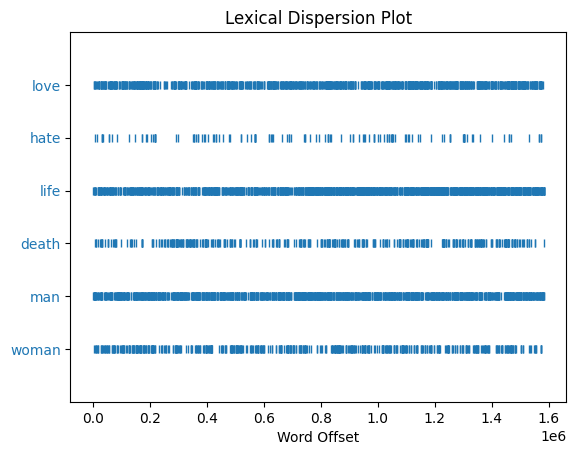

In [ ]:
# 3. dispersion_plot(): visualizes where specific words appear throughout the text
print("\n--- dispersion plot --- (a graph will be displayed)")
movie_text.dispersion_plot(['love', 'hate', 'life', 'death', 'man', 'woman'])

In [ ]:
# 4. FreqDist(): word frequency analysis
from nltk.probability import FreqDist
fdist = FreqDist(movie_text)
print("\n--- Top 10 most frequent words ---")
print(fdist.most_common(15))


--- 가장 흔한 단어 Top 10 ---
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
